In [52]:
import numpy as np
from scipy.linalg import circulant, toeplitz
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import sympy as s
import scipy
import functools
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# alternating chains
def create_circ(forward, backward, N):
    return circulant([0,] + [forward,] + [0,]*(N-3) + [backward,])
def create_toeplitz(forward, backward, N):
    return toeplitz([0,forward] + [0,]*(N-2), [0,backward] + [0,]*(N-2))

In [54]:
def get_sym_and_anti(c):
    val = (c[1][0] + c[0][1])/2
    if c[1][0] == c[0][-1]:
        sym = create_circ(val, val, len(c))
    else:
        sym = create_toeplitz(val, val, len(c))
    return sym, c-sym

In [55]:
lookup = {
    'vf': -999999.0,
    'vb': -999998.0,
    'hf': -999997.0,
    'hb': -999996.0
}

In [56]:
@functools.lru_cache()
def get_symbolic(N):
    assert N % 2 == 0
    pauli_z = np.array([[1,0],[0,-1]])
    I_and_pauli_z = np.kron(np.eye(int(N/2)), pauli_z)
    I_and_I = np.eye(N)

    vert_block = create_toeplitz(lookup['vf'],lookup['vb'], N)
    horiz_block = create_toeplitz(lookup['hf'],lookup['hb'], N)

    vert_sym,   vert_anti = get_sym_and_anti(vert_block)
    horiz_sym, horiz_anti = get_sym_and_anti(horiz_block)

    A_h = np.kron(I_and_pauli_z, horiz_anti) + np.kron(I_and_I, horiz_sym)
    A_v = np.kron(vert_anti, I_and_pauli_z) + np.kron(vert_sym, I_and_I)
    out = A_h + A_v
    def update(a,b,c,d):
        out_cp = np.copy(out)
        out_cp[out == lookup['vf']] = a
        out_cp[out == lookup['vb']] = b
        out_cp[out == lookup['hf']] = c
        out_cp[out == lookup['hb']] = d
        return out_cp
    return update

## Test it out

CPU times: user 28.3 s, sys: 20.9 s, total: 49.3 s
Wall time: 6.88 s


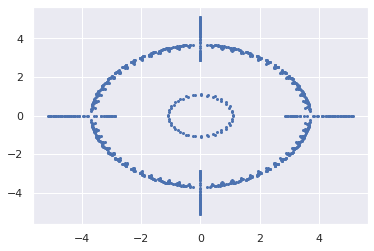

In [57]:
%%time
N = 32
vals = [1.2, 0, 4, 0]
m = get_symbolic(N)(*vals)
eigs = scipy.linalg.eigvals(m)
eigs = eigs[eigs != 0] # remove zero eigenvalues
plt.scatter(eigs.real, eigs.imag, s=4)

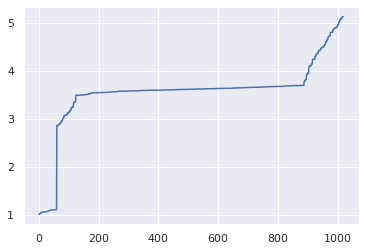

In [58]:
# magnitude of eigenvalues
plt.plot(sorted(np.sqrt(eigs*eigs.conj())))

In [62]:
def g(vf,vb,hf,hb,N):
    plt.figure()
    vals = [vf, vb, hf, hb]
    m = get_symbolic(N)(*vals)
    eigs = scipy.linalg.eigvals(m)
    eigs = eigs[eigs != 0] # remove zero eigenvalues
    plt.scatter(eigs.real, eigs.imag, s=4)
    plt.show()

In [63]:
N = 16
print("N:", N)
interactive_plot = interactive(g, 
                               vf=(0, 5, 0.1),
                               vb=(0, 5, 0.1), 
                               hf=(0, 5, 0.1), 
                               hb=(0, 5, 0.1), 
                               N = fixed(N), 
                               continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

N: 16


interactive(children=(FloatSlider(value=2.0, description='vf', max=5.0), FloatSlider(value=2.0, description='v…